Shape of X: (205, 43)
Shape of y: (205, 1)
Training samples: 164
Testing samples: 41


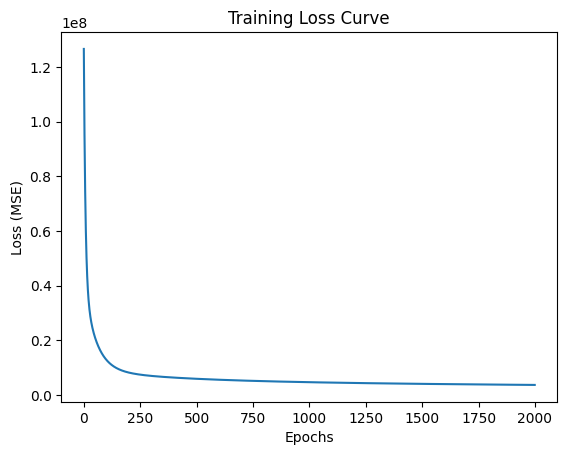

R² Score: -0.6963


,Actual,Predicted
0,8238.0,11625.118599
1,9298.0,14995.539464
2,9538.0,13558.172221
3,8449.0,22424.693822
4,9639.0,22418.429850
5,9989.0,18163.763198
6,11199.0,22642.366852
7,11549.0,18419.020060
8,17669.0,20464.770369
9,8948.0,12180.413736


In [9]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import zipfile
zipfile.ZipFile('CarPrices.zip', 'r').extractall('.')
# Load dataset
data = pd.read_csv("CarPrice_Assignment.csv")

# Display first few rows
data.head()
# Drop unnecessary columns
data = data.drop(["car_ID", "CarName"], axis=1)

# Convert categorical columns to dummy variables
data = pd.get_dummies(data, drop_first=True)

# Separate input (X) and output (y)
X = data.drop("price", axis=1).values
y = data["price"].values.reshape(-1, 1)

print("Shape of X:", X.shape)
print("Shape of y:", y.shape)
# Normalize features
# Simple normalization that will work
X = X.astype(float)  # Ensure all values are floats
X_normalized = (X - np.min(X, axis=0)) / (np.max(X, axis=0) - np.min(X, axis=0) + 1e-8)
X = X_normalized

# Add bias term (intercept column)
m = X.shape[0]
X = np.hstack((np.ones((m, 1)), X))  # add a column of ones for bias
# 80% for training, 20% for testing
split_ratio = 0.8
split_index = int(m * split_ratio)

X_train, X_test = X[:split_index], X[split_index:]
y_train, y_test = y[:split_index], y[split_index:]

print("Training samples:", X_train.shape[0])
print("Testing samples:", X_test.shape[0])
class LinearRegressionScratch:
    def __init__(self, learning_rate=0.01, epochs=1000):
        self.learning_rate = learning_rate
        self.epochs = epochs
        self.weights = None
        self.loss_history = []

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.weights = np.zeros((n_features, 1))

        for i in range(self.epochs):
            y_pred = X.dot(self.weights)
            error = y_pred - y
            gradient = (1/n_samples) * X.T.dot(error)
            self.weights -= self.learning_rate * gradient

            loss = (1/(2*n_samples)) * np.sum(error ** 2)
            self.loss_history.append(loss)

    def predict(self, X):
        return X.dot(self.weights)
model = LinearRegressionScratch(learning_rate=0.01, epochs=2000)
model.fit(X_train, y_train)

# Plot loss curve
plt.plot(model.loss_history)
plt.xlabel("Epochs")
plt.ylabel("Loss (MSE)")
plt.title("Training Loss Curve")
plt.show()
y_pred = model.predict(X_test)

# Calculate R²
ss_total = np.sum((y_test - np.mean(y_test)) ** 2)
ss_res = np.sum((y_test - y_pred) ** 2)
r2_score = 1 - (ss_res / ss_total)

print(f"R² Score: {r2_score:.4f}")
comparison = pd.DataFrame({
    "Actual": y_test.flatten()[:10],
    "Predicted": y_pred.flatten()[:10]
})
comparison